In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from xgboost import XGBClassifier

In [3]:
dir = '../input/classification/Face Mask Dataset - Copy'


In [4]:
Class=['WithMask', 'WithoutMask']
data = []

In [5]:
for i in Class:
    path = os.path.join(dir,i)
    label = Class.index(i)

    for img in os.listdir(path):
        impath = os.path.join(path,img)
        mask_img=cv2.imread(impath,0)
        mask_img=cv2.resize(mask_img,(128,128))
        image = np.array(mask_img).flatten()
        
        data.append([image,label])

In [6]:
print(len(data))

10000


In [7]:
pick_in = open('x.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [8]:
pick_in = open('x.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [9]:
features = []
labels = []
random.shuffle(data)

In [10]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25)

In [12]:
model = SVC(C=1, gamma = 'auto', kernel = 'poly')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [13]:
pick = open('model_25.sav','wb')
pickle.dump(model,pick)
pick.close()

In [14]:
pred = model.predict(xtest)
acc = model.score(xtest,ytest)
print(Class[pred[34]])

WithMask


<function matplotlib.pyplot.show(close=None, block=None)>

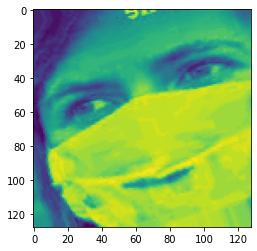

In [15]:
mask= xtest[34].reshape(128,128)
plt.imshow(mask)
plt.show

              precision    recall  f1-score   support

           0       0.93      0.83      0.87      1260
           1       0.84      0.93      0.89      1240

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



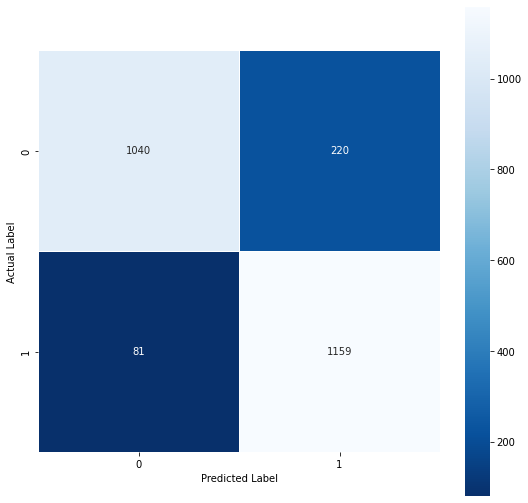

In [16]:
cm = metrics.confusion_matrix(ytest, pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred))

In [17]:
rf=RandomForestClassifier(n_estimators=500, min_samples_split = 20, max_features = 5)

In [18]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_features=5, min_samples_split=20, n_estimators=500)

In [19]:
pick = open('rf_model_20.sav','wb')
pickle.dump(rf,pick)
pick.close()

In [20]:
pred = rf.predict(xtest)
acc = rf.score(xtest,ytest)

print(Class[pred[90]])

WithoutMask


<function matplotlib.pyplot.show(close=None, block=None)>

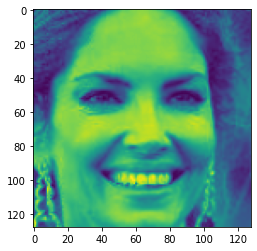

In [21]:
mask= xtest[90].reshape(128,128)
plt.imshow(mask)
plt.show

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1260
           1       0.95      0.86      0.91      1240

    accuracy                           0.91      2500
   macro avg       0.92      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



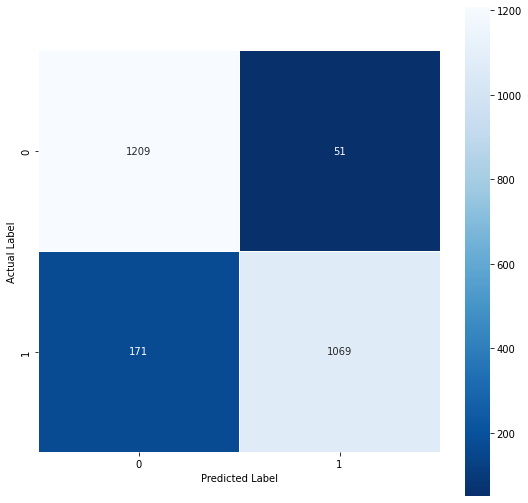

In [22]:
cm = metrics.confusion_matrix(ytest, pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred))

**RF GOOD AT CLASSIFYING 0 WHEREAS SVM GOOD AT CLASSSFYING 1**

In [23]:
all_models = [model, rf]
s_train, s_test = stacking(all_models, xtrain, ytrain, xtest ,shuffle = True, n_folds=4)

In [24]:
final_model = model
final_model = final_model.fit(s_train, ytrain)

In [25]:
pred_final = final_model.predict(xtest)
print(pred_final[26])

ValueError: X has 16384 features, but SVC is expecting 2 features as input.

In [ ]:
mask= xtest[26].reshape(128,128)
plt.imshow(mask)
plt.show

In [ ]:
cm = metrics.confusion_matrix(s_test, pred_final)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(s_test, pred_final))

In [ ]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

In [ ]:
pred_boost = xgb.predict(xtest)

In [ ]:
print(pred_boost[45])

In [ ]:
mask = xtest[45].reshape(128,128)
plt.imshow(mask)
plt.show

In [ ]:
cm = metrics.confusion_matrix(ytest, pred_boost)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred_boost))

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Support Vector Machine', model), ('Random Forest',rf)], voting='soft', weights=[2,1]).fit(xtrain,ytrain)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(xtest,ytest))